# Building Agents That Use Code

Ce notebook fait parti du cours <a href="https://huggingface.co/learn/agents-course/fr">sur les agents d'Hugging Face</a>, un cours gratuit qui vous guidera, du **niveau débutant à expert**, pour comprendre, utiliser et construire des agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Installons les dépendances et connectons-nous à notre compte HF pour accéder à l'API Inference

Si vous n'avez pas encore installé `smolagents`, vous pouvez le faire en exécutant la commande suivante :

In [ ]:
!pip install smolagents

Nous allons également nous connecter au Hugging Face Hub pour avoir accès à l'API d'inférence.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## Le décorateur `@tool`

### Générer un outil qui récupère le service de traiteur le mieux noté

Imaginons qu'Alfred ait déjà décidé du menu pour la fête, mais qu'il ait maintenant besoin d'aide pour préparer la nourriture pour un si grand nombre d'invités. Pour ce faire, il aimerait engager un service de traiteur et doit identifier les options les mieux notées disponibles. Alfred peut utiliser un outil pour rechercher les meilleurs services de traiteur proche de chez lui.

Voici un exemple de la façon dont Alfred peut utiliser le décorateur `@tool` pour y parvenir :

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 0: Duration 6.83 seconds| Input tokens: 2,077 | Output tokens: 66]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 1: Duration 3.59 seconds| Input tokens: 4,325 | Output tokens: 138]

Gotham Catering Co.


## Définir un outil comme une classe Python

### Générer un outil pour générer des idées pour une fête sur le thème des super-héros

La fête d'Alfred au manoir est un **événement à thème portant sur les super-héros**, mais il a besoin d'idées créatives pour la rendre vraiment spéciale. En tant qu'hôte fantastique, il veut surprendre les invités avec un thème unique.

Pour ce faire, il peut utiliser un agent qui génère des idées de fêtes sur le thème des super-héros en fonction d'une catégorie donnée. De cette façon, Alfred peut trouver le thème de fête parfait pour épater ses invités.

In [ ]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme = superhero_party_theme_generator(category="villain masquerade")                                           
  final_answer(theme)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 0: Duration 4.13 seconds| Input tokens: 2,113 | Output tokens: 63]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Partager un outil sur le Hub

Partager votre outil personnalisé avec la communauté est facile ! Il suffit de le télécharger sur votre compte Hugging Face en utilisant la méthode `push_to_hub()`.

Par exemple, Alfred peut partager son `party_theme_tool` pour aider les autres à trouver les meilleurs services de traiteur à Gotham. Voici comment faire :

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importer un outil depuis le Hub

Vous pouvez facilement importer des outils créés par d'autres utilisateurs en utilisant la fonction `load_tool()`. Par exemple, Alfred pourrait vouloir générer une image promotionnelle pour la fête en utilisant l'IA. Au lieu de construire un outil à partir de zéro, il peut exploiter un outil prédéfini de la communauté :

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image_prompt = "A luxurious superhero-themed party at Wayne Manor, with guests donning unique, made-up           
  superhero costumes. The room is decorated with lavish chandeliers and a grand staircase. The partygoers are      
  enjoying cocktails and canapés, while Batman stands proudly in the background."                                  
  image = image_generator(prompt=image_prompt)                                                                     
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7D7A93A1CB50>

[Step 0: Duration 78.13 seconds| Input tokens: 2,107 | Output tokens: 128]

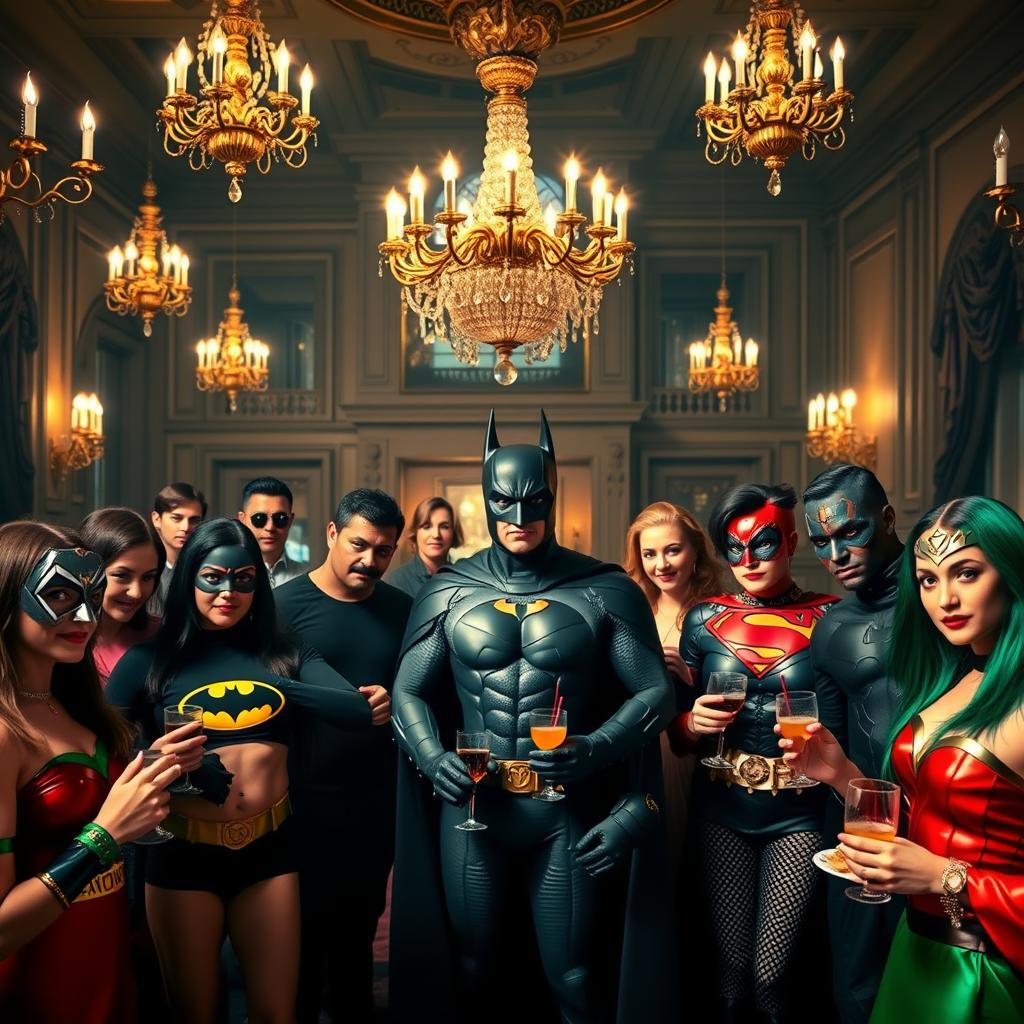

In [ ]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importer un Space comme outil

Vous pouvez également importer un *Space* comme outil en utilisant `Tool.from_space()`. Cela ouvre des possibilités d'intégration avec des milliers de *Spaces* de la communauté pour des tâches allant de la génération d'images à l'analyse de données.

L'outil se connectera au *backend Gradio* des *Spaces* en utilisant le `gradio_client`, alors assurez-vous de l'installer via `pip` si vous ne l'avez pas déjà fait.

Pour la fête, Alfred peut utiliser un *Space* existant pour la génération de l'image générée par IA à utiliser comme invitation (au lieu de l'outil pré-construit que nous avons mentionné précédemment). Construisons-le !

In [ ]:
!pip install gradio_client

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improve the prompt                                                                                             
  improved_prompt = "A grand, superhero-themed party at Wayne Manor, with elaborate decorations featuring capes,   
  masks, and cityscapes. Alfred Pemberton oversees a luxurious gala, ensuring every detail is perfect. The room    
  is filled with high Society guests dressed in superhero-themed attire, enjoying drinks and delicious food.       
  Flashing lights and holograms create a dynamic atmosphere that captures the spirit of Gotham City's elite."      
                                                                                                                   
  print(f"Improved Prompt: {improved_prompt}")                                                                     
                                                                                                                   
  # Generate an image of the improved prompt                                                                       
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Improved Prompt: A grand, superhero-themed party at Wayne Manor, with elaborate decorations featuring capes, masks,
and cityscapes. Alfred Pemberton oversees a luxurious gala, ensuring every detail is perfect. The room is filled 
with high Society guests dressed in superhero-themed attire, enjoying drinks and delicious food. Flashing lights 
and holograms create a dynamic atmosphere that captures the spirit of Gotham City's elite.

Out - Final answer: /tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp

[Step 0: Duration 31.37 seconds| Input tokens: 2,104 | Output tokens: 166]

'/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

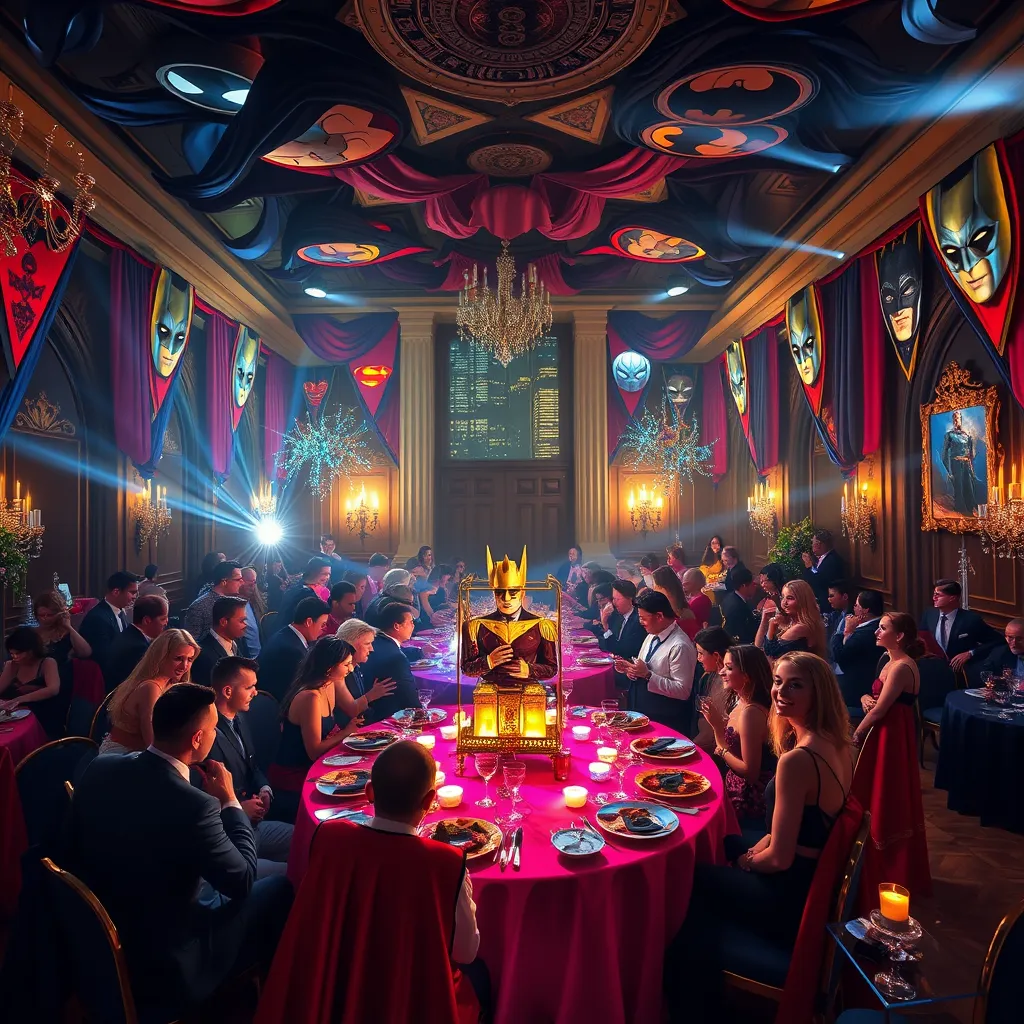

In [ ]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

img = PILImage.open(image_path)
img

## Importer un outil LangChain

Ces outils ont besoin d'une [clé API SerpApi](https://serpapi.com/).

Nous discuterons du *framework* `LangChain` dans les sections à venir. Pour l'instant, nous notons simplement que nous pouvons réutiliser des outils LangChain dans votre *workflow* `smolagents` !

Vous pouvez facilement charger des outils LangChain en utilisant la méthode `Tool.from_langchain()`. Alfred, toujours aussi perfectionniste, prépare une spectaculaire soirée de super-héros au manoir pendant l'absence des Wayne. Pour s'assurer que chaque détail dépasse les attentes, il utilise les outils LangChain pour trouver des idées de divertissement de premier ordre.

En utilisant `Tool.from_langchain()`, Alfred ajoute sans effort des fonctionnalités de recherche avancées à son agent, lui permettant de découvrir des idées et services de fête exclusifs avec seulement quelques commandes.

Voici comment il procède :

In [ ]:
!pip install langchain-community google-search-results

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="virtual event ideas for superhero-themed events, including live performances and interactive        
  experiences")                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ['From theme days to care packages to costume contests, here is a list of fun ways to celebrate spirit weeks 
in remote offices.', 'Our virtual superhero happy hour event includes fun activities and a virtual field trip to 
iconic superhero filming sites. Your team will learn ...', 'Create your own music festival experience by watching 
videos and recorded shows together, or make plans to attend a live online show together.', "We'll explore unique 
and engaging event ideas for both in-person and virtual gatherings to ensure that your event leaves a lasting 
impression on your guests.", 'Teams get to design their own superhero characters and comics, then assemble Green 
Machine bikes and teddy bears for deserving kids.', 'Meet your favorite Superhero right from your own home! 15 
minutes includes personalized chat time, brief "Superhero Training," and singing "Happy Birthday" (if ...', 
'Superhero Theme. Everyone can dress up as their favorite superheroes or create their own superheroes for a fun and
imaginative virtual costume ...', 'These 10 best virtual networking event ideas will take your virtual gatherings 
from bland to brilliant.', 'The best unusual team building activities for virtual meetings are games that build 
critical team skills like communication, collaboration, and creativity.', 'Find virtual office party ideas your 
team will love! Perfect for virtual meetings, awards ceremonies, holiday parties, and more.']

[Step 0: Duration 11.74 seconds| Input tokens: 2,082 | Output tokens: 61]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="superhero-themed live performances and interactive experiences for events")                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ["Allow your guests to live out their childhood fantasy of being a superhero from a comic book with O'Brien 
Productions Superheroes Party.", 'When in doubt, throw a superhero party - this party theme will save the day! Be 
the hero of your own story, and create the ultimate superhero themed event.', 'Engage in action-packed activities, 
thrilling photo ops, and dynamic performances that bring superhero stories to life. Versatile Appearances. Perfect 
for ...', 'OVERVIEW. Join Spider-Man, Hulk, Captain America, Iron Man and the Avengers against the forces of evil. 
Climb vertical treadmills with Spiderman.', 'We offer several superhero party characters & affordable party 
packages.Black Panther,Superman,Wonder Woman,Iron Man party.', 'Superhero Encounter brings your favourite comic 
book characters to life with action-packed performances and interactive experiences. Perfect for parties, ...', 'We
designed & produced multiple themed interactive activations & media zones for this Superhero themed event for a 
biotech company. Our Experiential ...', 'Unleash the hero within! Strike a legendary pose during scheduled photo 
moments with such Super Heroes as: Spider-Man; Thor; Loki; Black Panther; Shuri from ...', 'What is included in a 
superhero party? · Fun games and prizes · Epic superhero story time · An extra special surprise for the VIP 
birthday boy/girl.', 'Live out your fictional fantasies at your very own Superhero themed event! Our props, 
performers, and decor will save the day!']

[Step 1: Duration 7.26 seconds| Input tokens: 4,574 | Output tokens: 119]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      {                                                                                                            
          "name": "O'Brien Productions Superheroes Party",                                                         
          "description": "Engages guests with dynamic performances and action-packed activities that bring         
  superhero stories to life."                                                                                      
      },                                                                                                           
      {                                                                                                            
          "name": "Superhero Encounter",                                                                           
          "description": "Brings favorite comic book characters to life with action-packed performances and        
  interactive experiences, perfect for parties."                                                                   
      },                                                                                                           
      {                                                                                                            
          "name": "Biotech Company Event",                                                                         
          "description": "Included themed interactive activations and media zones providing a unique               
  superhero-themed experience."                                                                                    
      }                                                                                                            
  ]                                                                                                                
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: [{'name': "O'Brien Productions Superheroes Party", 'description': 'Engages guests with dynamic 
performances and action-packed activities that bring superhero stories to life.'}, {'name': 'Superhero Encounter', 
'description': 'Brings favorite comic book characters to life with action-packed performances and interactive 
experiences, perfect for parties.'}, {'name': 'Biotech Company Event', 'description': 'Included themed interactive 
activations and media zones providing a unique superhero-themed experience.'}]

[Step 2: Duration 13.02 seconds| Input tokens: 7,506 | Output tokens: 356]

[{'name': "O'Brien Productions Superheroes Party",
  'description': 'Engages guests with dynamic performances and action-packed activities that bring superhero stories to life.'},
 {'name': 'Superhero Encounter',
  'description': 'Brings favorite comic book characters to life with action-packed performances and interactive experiences, perfect for parties.'},
 {'name': 'Biotech Company Event',
  'description': 'Included themed interactive activations and media zones providing a unique superhero-themed experience.'}]

Grâce à cette configuration, Alfred peut rapidement découvrir des options de divertissement luxueuses et s'assurer que les invités de l'élite de Gotham vivent une expérience inoubliable. Cet outil l'aide à organiser l'événement parfait sur le thème des super-héros ! 🎉